# TAREA

## Integración Montecarlo

1. Realizar las siguientes integrales. Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y cuyas columnas correspondan a las funciones.
    + $\int_{1}^{3} e^{x}\log(x)\text{d}x$.
    + $\int_1^3 \sin(x)\ln(x) \text{d}x$

In [19]:
import numpy as np
import pandas as pd

def g(x):
    return np.exp(x)*np.log10(x)

a = 1
b = 3
N = np.logspace(1, 5, 5)

table1 = pd.DataFrame(columns = ["Aproximación", "Error"], index=N)

def montecarlo1(g, N, a, b):
    u = np.random.uniform(a, b, N)
    media = np.mean(g(u))
    return media*(b-a)

montecarlo1(g, 1000, a, b)

5.861592700001956

In [20]:
import numpy as np
import pandas as pd

def f(x):
    return np.sin(x)*np.log(x)

a = 1
b = 3
N = np.logspace(1, 5, 5)

table1 = pd.DataFrame(columns = ["Aproximación", "Error"], index=N)

def montecarlo1(f, N, a, b):
    u = np.random.uniform(a, b, N)
    media = np.mean(f(u))
    return media*(b-a)

montecarlo1(f, 1000, a, b)

0.8789495988209853

In [28]:
N = np.logspace(1, 5, 5)
table6 = pd.DataFrame(columns=["Aproximación1", "Error1", "Aproximación2", "Error2"])
for i in N:
    aproximacion3 = montecarlo1(g, int(i), a, b)
    table6.loc[i, "Aproximación1"] = aproximacion3
    table6.loc[i, "Error1"] = abs(6.09207 -  aproximacion3)
    aproximacion4 = montecarlo1(f, int(i), a, b)
    table6.loc[i, "Aproximación2"] = aproximacion4
    table6.loc[i, "Error2"] = abs(0.8698 -  aproximacion4) 
table6

,Aproximación1,Error1,Aproximación2,Error2
10.0,5.880321,0.211749,0.964054,0.094254
100.0,5.653324,0.438746,0.787534,0.082266
1000.0,6.028691,0.063379,0.872334,0.002534
10000.0,6.111511,0.019441,0.86709,0.00271
100000.0,6.112427,0.020357,0.867735,0.002065


2. Aproximar el área de la región descrita por

$$x^2+2y^2\leq-2x+8y-7$$

Poner los resultados en una tabla cuyas filas correspondan a la cantidad de términos utilizados en la aproximación (usar 10, 100, 1000, 10000 y 100000 términos) y en las columnas el valor de aproximación y el error relativo.

Definir unos límites adecuados $a_1$, $b_1$, $a_2$ y $b_2$, para la región $R=\left[a_1,b_1\right]\times\left[a_2,b_2\right]$

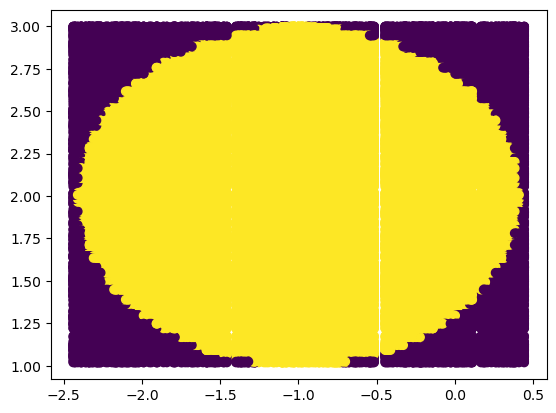

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline

def bernoulli(x,y):
    return (x**2) + 2*y**2 <= - 2*x + 8*y - 7

x = np.random.uniform(-2.45, 0.45, 300)
y = np.random.uniform(3, 1, 300)
X, Y = np.meshgrid(x, y)
plt.figure()
plt.scatter(X, Y, c=bernoulli(X, Y))

In [44]:

def montecarlo2(region, xa, xb, ya, yb, N):
    x = np.random.uniform(xa, xb, N)
    y = np.random.uniform(ya, yb, N)
    B = region(x,y)
    AR = (xb-xa)*(yb-ya)
    return np.mean(B)*AR

table2 = pd.DataFrame(columns = ["Aproximación", "Error"], index=N)

for i in N:
    aproximacion2 = montecarlo2(bernoulli, -2.45, 0.45, 1, 3, int(i))
    table2.loc[i, "Aproximación"] = aproximacion2
    table2.loc[i, "Error"] = np.log10((1-(4/60.1315))/(4/60.1315))-(1/2)*np.log10(N)
table2

,Aproximación,Error
10.0,5.22,"[0.6471466566821706, 0.14714665668217064, -0.3..."
100.0,4.176,"[0.6471466566821706, 0.14714665668217064, -0.3..."
1000.0,4.495,"[0.6471466566821706, 0.14714665668217064, -0.3..."
10000.0,4.43468,"[0.6471466566821706, 0.14714665668217064, -0.3..."
100000.0,4.452312,"[0.6471466566821706, 0.14714665668217064, -0.3..."


3. Describe 3 casos de uso de integración Montecarlo en tu ingeniería.

**1. Estimación de la probabilidad de incumplimiento (PD) en modelos de riesgo de crédito:**
En la ingeniería financiera, la probabilidad de incumplimiento (PD) se refiere a la probabilidad de que un prestatario no pueda cumplir con sus obligaciones de pago de deuda.

**1.1 Aplicación:**  Simular diferentes escenarios económicos y calcular la PD de un prestatario o una cartera de préstamos.


**2. Valoración de swaps de tasas de interés y derivados de tipos de interés:**
Los swaps de tasas de interés y otros derivados de tipos de interés son instrumentos financieros que permiten a las partes intercambiar flujos de efectivo basados en tasas de interés. 

**2.1 Aplicación:** Estimar el valor presente de estos flujos de efectivo en función de las tasas de interés futuras previstas.

**3. Valoración de bonos corporativos y gubernamentales:**
La valoración de bonos corporativos y gubernamentales implica calcular su valor presente, que depende de los flujos de efectivo futuros que el bono generará, como los pagos de cupones y el valor nominal al vencimiento.

**3.1 Aplicación:** Estimar los posibles movimientos futuros de las tasas de interés, lo que a su vez afecta el valor presente del bono.